In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()


In [84]:
df=pd.read_csv('heart_disease_uci.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [85]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [87]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [88]:
df.describe(include='O')

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [89]:
df.shape

(920, 16)

In [90]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [91]:
df=df.drop(columns=['ca','thal'])

In [92]:
df.shape

(920, 14)

In [93]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping', nan], dtype=object)

In [94]:
# slope=df['slope'].dropna()
# slope=enc.fit_transform(slope)
# print(slope.mean().round())
# df['slope']=df['slope'].fillna(value='flat')
# df['slope'].isnull().sum()

In [95]:
# null_columns = df.columns[df.isnull().any()].to_numpy()
# null_columns
null_columns = ['trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope']

for col in null_columns:
    if df[col].dtype=='float64' or df[col].dtype=='int64':    
        cleancol = df[col].dropna()
        mean = round(cleancol.mean())
        df[col] = df[col].fillna(value=mean)

    else:
        mode=df[col].mode().iloc[0]
        df[col]=df[col].fillna(mode)


/tmp/ipykernel_1083351/2236684200.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col]=df[col].fillna(mode)


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 88.2+ KB


In [97]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,num
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,460.500000,53.510870,132.123913,199.126087,137.572826,0.886957,0.995652
std,265.725422,9.424685,18.443924,108.957636,25.138725,1.054212,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,230.750000,47.000000,120.000000,177.750000,120.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,221.000000,138.000000,0.800000,1.000000
75%,690.250000,60.000000,140.000000,267.000000,156.000000,1.500000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [98]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0


In [ ]:

# df['age_group']=pd.cut(df['age'],bins=[28,30,40,50,60,70,77],labels=['28-40','40-45','45-50','50-60','60-70','70-77'], right=True)
# df.groupby(['age_group'],observed=True,as_index=False)['trestbps'].count()

df['age_group']=pd.qcut(df['age'],10)
df.groupby(['age_group'],observed=True,as_index=False)['oldpeak'].count()


,age_group,oldpeak
0,"(27.999, 40.0]",93
1,"(40.0, 45.0]",103
2,"(45.0, 49.0]",96
3,"(49.0, 52.0]",96
4,"(52.0, 54.0]",84
5,"(54.0, 57.0]",117
6,"(57.0, 59.0]",78
7,"(59.0, 62.0]",98
8,"(62.0, 65.0]",73
9,"(65.0, 77.0]",82


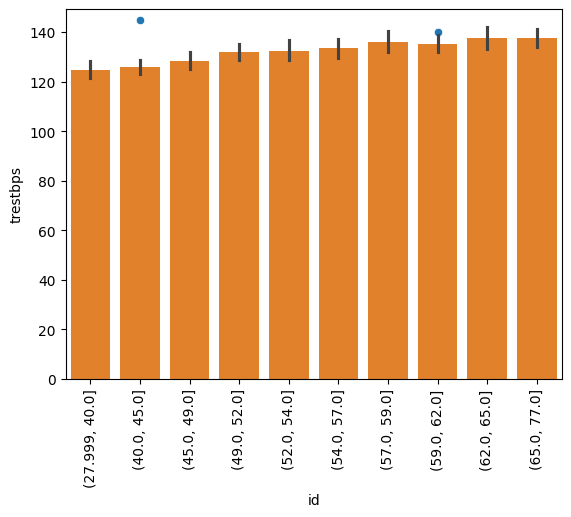

In [157]:
sns.scatterplot(x='id',y='trestbps', data=df)

sns.barplot(x='age_group',y='trestbps',data=df)
plt.xticks(rotation=90)
plt.show()

In [150]:
df['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. , -1.1, -1.5, -0.1,
       -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [158]:
df.groupby(['age_group'],observed=True,as_index=False)['trestbps'].count()


,age_group,trestbps
0,"(27.999, 40.0]",93
1,"(40.0, 45.0]",103
2,"(45.0, 49.0]",96
3,"(49.0, 52.0]",96
4,"(52.0, 54.0]",84
5,"(54.0, 57.0]",117
6,"(57.0, 59.0]",78
7,"(59.0, 62.0]",98
8,"(62.0, 65.0]",73
9,"(65.0, 77.0]",82


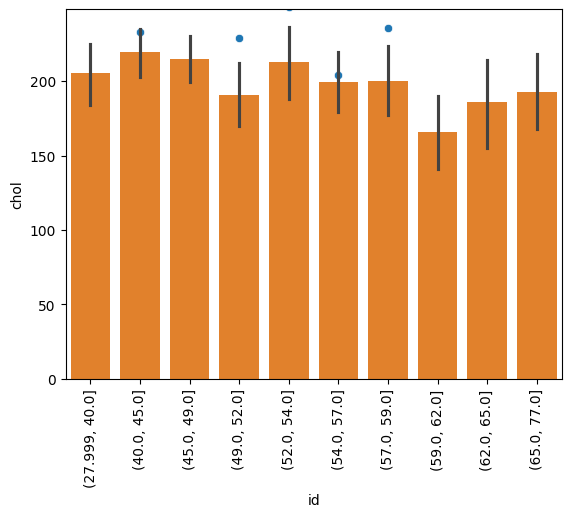

In [101]:
sns.scatterplot(x='id',y='chol', data=df)
sns.barplot(x='age_group',y='chol',data=df)
plt.xticks(rotation=90)
plt.show()


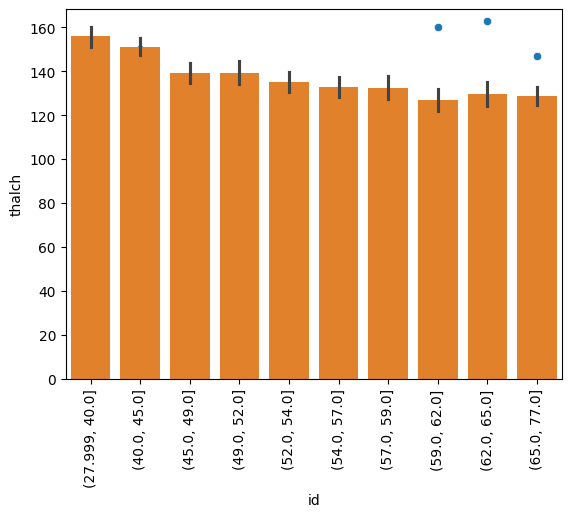

In [102]:
sns.scatterplot(x='id',y='thalch', data=df)
sns.barplot(x='age_group',y='thalch',data=df)
plt.xticks(rotation=90)
plt.show()


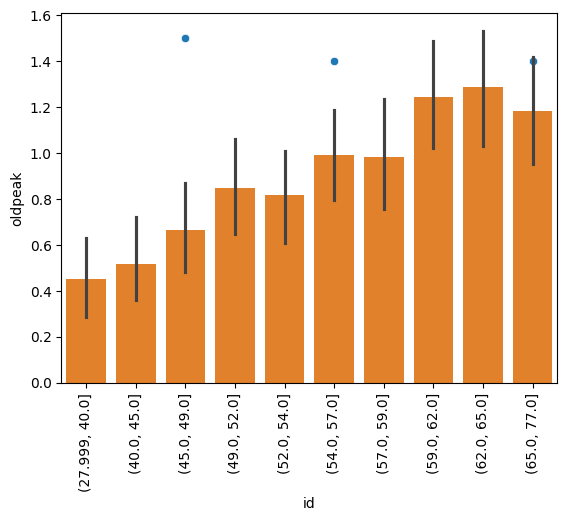

In [149]:
sns.scatterplot(x='id',y='oldpeak', data=df)
sns.barplot(x='age_group',y='oldpeak',data=df)
plt.xticks(rotation=90)
plt.show()


USING INTERQUARTILE RANGE TO REMOVE OUTLIERS

In [104]:
# df_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']

# for col in df_columns:
#     quartile_1=df[col].quantile(0.25)
#     quartile_2=df[col].quantile(0.75)
#     inter_quartile_range = quartile_2 - quartile_1
#     lb=quartile_1 - 1.5 * inter_quartile_range
#     ub=quartile_2 + 1.5 * inter_quartile_range

#     df = df[(df[col] >= lb) & (df[col] <= ub)]


# df.describe()


In [105]:
# sns.scatterplot(x='id',y='trestbps', data=df)
# df['age_group']=pd.qcut(df['age'],10)
# df.groupby(['age_group'],observed=True,as_index=False)['trestbps'].count()
# sns.barplot(x='age_group',y='trestbps',data=df)
# plt.xticks(rotation=90)
# plt.show()

In [106]:
# sns.scatterplot(x='id',y='chol', data=df)
# sns.barplot(x='age_group',y='chol',data=df)
# plt.xticks(rotation=90)
# plt.show()

In [107]:
# sns.scatterplot(x='id',y='thalch', data=df)
# sns.barplot(x='age_group',y='thalch',data=df)
# plt.xticks(rotation=90)
# plt.show()


In [108]:
# sns.scatterplot(x='id',y='oldpeak', data=df)
# sns.barplot(x='age_group',y='oldpeak',data=df)
# plt.xticks(rotation=90)
# plt.show()


In [109]:
df['num'].unique()

array([0, 2, 1, 3, 4])

In [110]:
num_map={
    0:'non_existent',
    1:'mild',
    2:'moderate',
    3:'severe',
    4:'critical'
         }

In [111]:
df['num_levels']=df['num'].map(num_map)
# print(num_map)
# print(df['num_levels'].head(15))
# print(df['num'].head(15))


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression


In [113]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'num', 'age_group',
       'num_levels'],
      dtype='object')

In [114]:
x=df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs','restecg',
       'thalch', 'exang', 'oldpeak', 'slope']]
y=df[['num']]

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [116]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 880 to 102
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       736 non-null    int64  
 1   sex       736 non-null    object 
 2   cp        736 non-null    object 
 3   trestbps  736 non-null    float64
 4   chol      736 non-null    float64
 5   fbs       736 non-null    bool   
 6   restecg   736 non-null    object 
 7   thalch    736 non-null    float64
 8   exang     736 non-null    bool   
 9   oldpeak   736 non-null    float64
 10  slope     736 non-null    object 
dtypes: bool(2), float64(4), int64(1), object(4)
memory usage: 58.9+ KB


In [117]:
cols=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope']

for col in cols:
    if x_train[col].dtype == bool:
        x_train[col]=x_train[col].astype('object')

In [118]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 880 to 102
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       736 non-null    int64  
 1   sex       736 non-null    object 
 2   cp        736 non-null    object 
 3   trestbps  736 non-null    float64
 4   chol      736 non-null    float64
 5   fbs       736 non-null    object 
 6   restecg   736 non-null    object 
 7   thalch    736 non-null    float64
 8   exang     736 non-null    object 
 9   oldpeak   736 non-null    float64
 10  slope     736 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 69.0+ KB


In [119]:
x_train.select_dtypes(include='number').columns.tolist()

['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [120]:
# x_train['slope'].unique()

In [121]:
cat_features=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope']
num_features=['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
one_hot=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
scaler=StandardScaler()


# Ordinal Encoder encodes those categorical features that have some level of hierachy to them
# One hot Encoder also encodes categorical features but does not take hierachy to consideration

ordinal_features=['restecg', 'slope', 'cp']

ordinal_categories=[
    ['normal', 'st-t abnormality', 'lv hypertrophy'],
    ['flat', 'upsloping', 'downsloping'],
    ['asymptomatic', 'non-anginal', 'atypical angina', 'typical angina']
]

ordinal_enc=OrdinalEncoder(categories=ordinal_categories)

In [122]:
preprocessor = ColumnTransformer(transformers=[
    ('cat',Pipeline(steps=[
        ('one_hot',one_hot)
    ]),cat_features),
    ('num',Pipeline(steps=[
        ('scaler',scaler)
    ]),num_features),
    ('ordinal', Pipeline(steps=[
        ('ordinal',ordinal_enc)
    ]),ordinal_features)
])
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('one_hot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['sex', 'cp', 'fbs', 'restecg', 'exang',
                                  'slope']),
                                ('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'trestbps', 'chol', 'thalch',
                                  'oldpeak']),
                                ('ordinal',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder(categories=[['normal',
                                                                              'st-t '
                                                                              'abnormality',
                                                                              'lv '
                                                                              'hypertrophy'],
                                                                             ['flat',
                                                                              'upsloping',
                                                                              'downsloping'],
                                                                             ['asymptomatic',
                                                                              'non-anginal',
                                                                              'atypical '
                                                                              'angina',
                                                                              'typical '
                                                                              'angina']]))]),
                                 ['restecg', 'slope', 'cp'])])

In [159]:
preprocessor.fit_transform(x_train,x_test)

array([[0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 0., 2., 0.],
       [1., 0., 0., ..., 0., 0., 2.],
       [1., 0., 1., ..., 2., 1., 0.]], shape=(736, 24))

In [124]:
pipeline_rf=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, min_samples_split=3))
])
pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang',
                                                   'slope']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['normal',
                                                                                               'st-t '
                                                                                               'abnormality',
                                                                                               'lv '
                                                                                               'hypertrophy'],
                                                                                              ['flat',
                                                                                               'upsloping',
                                                                                               'downsloping'],
                                                                                              ['asymptomatic',
                                                                                               'non-anginal',
                                                                                               'atypical '
                                                                                               'angina',
                                                                                               'typical '
                                                                                               'angina']]))]),
                                                  ['restecg', 'slope',
                                                   'cp'])])),
                ('model', RandomForestClassifier(min_samples_split=3))])

In [125]:
pipeline_rf.fit(x_train,y_train)

/home/happy/Documents/DataScienceProjects/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang',
                                                   'slope']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['normal',
                                                                                               'st-t '
                                                                                               'abnormality',
                                                                                               'lv '
                                                                                               'hypertrophy'],
                                                                                              ['flat',
                                                                                               'upsloping',
                                                                                               'downsloping'],
                                                                                              ['asymptomatic',
                                                                                               'non-anginal',
                                                                                               'atypical '
                                                                                               'angina',
                                                                                               'typical '
                                                                                               'angina']]))]),
                                                  ['restecg', 'slope',
                                                   'cp'])])),
                ('model', RandomForestClassifier(min_samples_split=3))])

In [126]:
y_pred=pipeline_rf.predict(x_test)
y_pred

array([0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       3, 1, 1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 3, 0, 2, 0,
       1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 3, 3, 0, 1, 1, 0, 0, 1, 3, 0, 2,
       0, 0, 1, 4, 2, 0, 4, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 4, 1, 1,
       1, 2, 3, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 3, 0, 2, 1, 0, 3, 2, 1, 3, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 3, 1, 1, 0, 0, 1, 0, 1, 0, 1, 3, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1])

In [127]:
print(accuracy_score(y_pred,y_test))
# Class got 0.572463768115942


0.5597826086956522


In [128]:
confusion_matrix(y_pred,y_test)


array([[68, 19,  2,  7,  0],
       [ 6, 27, 15, 13,  0],
       [ 1,  1,  3,  1,  2],
       [ 0,  5,  5,  4,  1],
       [ 0,  2,  0,  1,  1]])

In [129]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
pipeline_dt=Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', DecisionTreeClassifier())
])
pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang',
                                                   'slope']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['normal',
                                                                                               'st-t '
                                                                                               'abnormality',
                                                                                               'lv '
                                                                                               'hypertrophy'],
                                                                                              ['flat',
                                                                                               'upsloping',
                                                                                               'downsloping'],
                                                                                              ['asymptomatic',
                                                                                               'non-anginal',
                                                                                               'atypical '
                                                                                               'angina',
                                                                                               'typical '
                                                                                               'angina']]))]),
                                                  ['restecg', 'slope',
                                                   'cp'])])),
                ('model', DecisionTreeClassifier())])

In [131]:
pipeline_dt.fit(x_train,y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang',
                                                   'slope']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(categories=[['normal',
                                                                                               'st-t '
                                                                                               'abnormality',
                                                                                               'lv '
                                                                                               'hypertrophy'],
                                                                                              ['flat',
                                                                                               'upsloping',
                                                                                               'downsloping'],
                                                                                              ['asymptomatic',
                                                                                               'non-anginal',
                                                                                               'atypical '
                                                                                               'angina',
                                                                                               'typical '
                                                                                               'angina']]))]),
                                                  ['restecg', 'slope',
                                                   'cp'])])),
                ('model', DecisionTreeClassifier())])

In [132]:
y_pred_dt=pipeline_dt.predict(x_test)
y_pred_dt


array([0, 0, 1, 3, 4, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 3,
       2, 3, 3, 1, 2, 0, 3, 0, 0, 1, 0, 0, 0, 3, 1, 0, 1, 2, 2, 1, 1, 0,
       0, 1, 2, 0, 2, 0, 1, 0, 3, 2, 0, 3, 3, 0, 1, 1, 0, 0, 1, 3, 0, 2,
       0, 0, 3, 3, 2, 0, 1, 0, 3, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3, 4, 2, 1,
       3, 4, 0, 4, 0, 2, 0, 4, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 0,
       0, 0, 3, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 3, 0, 2, 0, 2, 2, 1, 0,
       0, 0, 2, 0, 0, 1, 0, 1, 2, 3, 0, 2, 0, 1, 0, 4, 0, 0, 1, 1, 3, 1,
       1, 0, 3, 3, 1, 0, 2, 3, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 4, 1, 1, 1])

In [133]:
print(accuracy_score(y_pred_dt,y_test))

0.5163043478260869


VOTING CLASSIFIER

In [136]:
logistic_clf=LogisticRegression()
random_clf=RandomForestClassifier()
decision_clf=DecisionTreeClassifier()



In [137]:
voting_clf=VotingClassifier(estimators=[
    ('Logistic',logistic_clf),
    ('Random Rorest', random_clf),
    ('Decision Tree', decision_clf)
],voting='soft')

voting_clf

VotingClassifier(estimators=[('Logistic', LogisticRegression()),
                             ('Random Rorest', RandomForestClassifier()),
                             ('Decision Tree', DecisionTreeClassifier())],
                 voting='soft')

In [139]:
voting_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',voting_clf)
])
voting_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang',
                                                   'slope']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   Ordinal...
                                                                                               'st-t '
                                                                                               'abnormality',
                                                                                               'lv '
                                                                                               'hypertrophy'],
                                                                                              ['flat',
                                                                                               'upsloping',
                                                                                               'downsloping'],
                                                                                              ['asymptomatic',
                                                                                               'non-anginal',
                                                                                               'atypical '
                                                                                               'angina',
                                                                                               'typical '
                                                                                               'angina']]))]),
                                                  ['restecg', 'slope',
                                                   'cp'])])),
                ('model',
                 VotingClassifier(estimators=[('Logistic',
                                               LogisticRegression()),
                                              ('Random Rorest',
                                               RandomForestClassifier()),
                                              ('Decision Tree',
                                               DecisionTreeClassifier())],
                                  voting='soft'))])

In [140]:
voting_pipeline.fit(x_train,y_train)

/home/happy/Documents/DataScienceProjects/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/happy/Documents/DataScienceProjects/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang',
                                                   'slope']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak']),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ordinal',
                                                                   Ordinal...
                                                                                               'st-t '
                                                                                               'abnormality',
                                                                                               'lv '
                                                                                               'hypertrophy'],
                                                                                              ['flat',
                                                                                               'upsloping',
                                                                                               'downsloping'],
                                                                                              ['asymptomatic',
                                                                                               'non-anginal',
                                                                                               'atypical '
                                                                                               'angina',
                                                                                               'typical '
                                                                                               'angina']]))]),
                                                  ['restecg', 'slope',
                                                   'cp'])])),
                ('model',
                 VotingClassifier(estimators=[('Logistic',
                                               LogisticRegression()),
                                              ('Random Rorest',
                                               RandomForestClassifier()),
                                              ('Decision Tree',
                                               DecisionTreeClassifier())],
                                  voting='soft'))])

In [143]:
y_pred_voting=voting_pipeline.predict(x_test)

In [145]:
print(accuracy_score(y_pred_voting,y_test))

0.5434782608695652
